# Logistic Regression for Attrition Problem 

In [1]:
# Import all the Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv("general_data_1.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
df.isnull()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df.dropna()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


In [5]:
df1 = df.fillna(method='ffill')
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B5A448A48>,
      dtype=object)

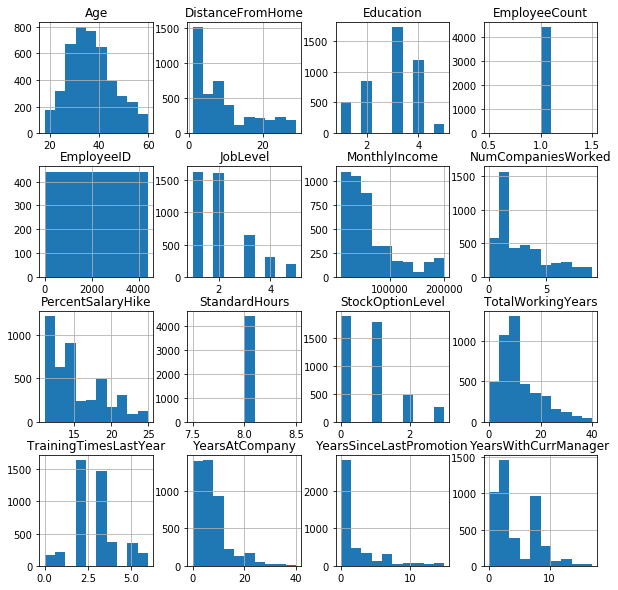

In [7]:
df.hist(figsize=(10,10))

In [8]:
le = preprocessing.LabelEncoder()
le.fit(df1["Gender"])
df1["Gender"] = le.transform(df1["Gender"])

In [9]:
le.fit(df1["MaritalStatus"])
df1["MaritalStatus"] = le.transform(df1["MaritalStatus"])

In [10]:
le.fit(df1["Attrition"])
df1["Attrition"] = le.transform(df1["Attrition"])

In [11]:
le.fit(df1["EducationField"])
df1["EducationField"] = le.transform(df1["EducationField"])

In [12]:
le.fit(df1["Department"])
df1["Department"] = le.transform(df1["Department"])

In [13]:
le.fit(df1["BusinessTravel"])
df1["BusinessTravel"] = le.transform(df1["BusinessTravel"])

In [14]:
df1['NumCompaniesWorked'] = df1['NumCompaniesWorked'].apply(np.int64)
df1['TotalWorkingYears'] = df1['TotalWorkingYears'].apply(np.int64)

In [15]:
df1.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,0.161224,1.607483,1.260544,9.192517,2.912925,2.247619,1.0,2205.500000,0.600000,...,65029.312925,2.693197,15.209524,8.0,0.793878,11.285261,2.799320,7.008163,2.187755,4.123129
std,9.133301,0.367780,0.665304,0.527673,8.105026,1.023933,1.331067,0.0,1273.201673,0.489954,...,47068.888559,2.499167,3.659108,0.0,0.851883,7.787073,1.288978,6.125135,3.221699,3.567327
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.0,1103.250000,0.000000,...,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,1.000000,7.000000,3.000000,2.000000,1.0,2205.500000,1.000000,...,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,2.000000,14.000000,4.000000,3.000000,1.0,3307.750000,1.000000,...,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,1.0,4410.000000,1.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [16]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [17]:
Y = df1[["Attrition"]]
X = df1[["Age","Gender","BusinessTravel","Department","EducationField","DistanceFromHome","Education","PercentSalaryHike","StockOptionLevel","TrainingTimesLastYear","NumCompaniesWorked","TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]]

In [18]:
df1.drop(["EmployeeID","Over18"],axis=1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,0,1,...,131160,1,11,8,0,1,6,1,0,0
1,31,1,1,1,10,1,1,1,0,1,...,41890,0,23,8,1,6,3,5,1,4
2,32,0,1,1,17,4,4,1,1,4,...,193280,1,15,8,3,5,2,5,0,3
3,38,0,0,1,2,5,1,1,1,3,...,83210,3,11,8,3,13,5,8,7,5
4,32,0,2,1,10,1,3,1,1,1,...,23420,4,12,8,2,9,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,1,0,1,...,60290,3,17,8,1,10,5,3,0,2
4406,29,0,2,1,2,4,3,1,1,1,...,26790,2,15,8,0,10,2,3,0,2
4407,25,0,2,1,25,2,1,1,1,2,...,37020,0,20,8,0,5,4,4,1,2
4408,42,0,2,2,18,2,3,1,1,1,...,23980,0,14,8,1,10,2,9,7,8


In [19]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
Logistics = sm.Logit(Y,X1)
result = Logistics.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.405104
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4394
Method:                           MLE   Df Model:                           15
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.08284
Time:                        14:54:18   Log-Likelihood:                -1786.5
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 1.040e-59
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.9112      0.376      2.426      0.015       0.175       1.647
Age                        -0.0346      0.007     -5.121      0.000      -0.048      -0.021
Gender                      0.0717      0.088      0.815      0.415      -0.101       0.244
BusinessTravel             -0.0025      0.064     -0.038      0.969      -0.128       0.123
Department                 -0.2628      0.080     -3.271      0.001      -0.420      -0.105
EducationField             -0.1091      0.033     -3.312      0.001      -0.174      -0.045
DistanceFromHome           -0.0030      0.005     -0.559      0.576      -0.013       0.007
Education                  -0.0535      0.042     -1.280      0.201      -0.135       0.028
PercentSalaryHike           0.0133      0.012      1.150      0.250      -0.009       0.036
StockOptionLevel           -0.0501      0.051     -0.990      0.322      -0.149       0.049
TrainingTimesLastYear      -0.1360      0.035     -3.928      0.000      -0.204      -0.068
NumCompaniesWorked          0.1070      0.018      5.951      0.000       0.072       0.142
TotalWorkingYears          -0.0537      0.012     -4.608      0.000      -0.076      -0.031
YearsAtCompany              0.0016      0.018      0.089      0.929      -0.034       0.037
YearsSinceLastPromotion     0.1247      0.020      6.167      0.000       0.085       0.164
YearsWithCurrManager       -0.1291      0.022     -5.929      0.000      -0.172      -0.086
===========================================================================================
"""

# Conclusion
From the Summary 'Age', 'Department', 'EducationField' , TrainingTimesLastYear', 'NumCompaniesWorked', 'TotalWorkingYears', YearsSinceLastPromotion', 'YearsWithCurrManager' are significant because both of their p-values are             "<0.05".